## Loading Data

In [3]:
%%time
%pylab inline
import sys
sys.path.append('../../../../../ufmg-latin/pscore/rfs/')

import rfslib.rankmodels
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

N_AUTHORS = None

import rfslib.datasets
dataset = rfslib.datasets.DBLPDataset('../../../../../pscore/datasets/',nauthors=N_AUTHORS)
dataset.prepare()
venuerank  = dataset.dfvenues.copy()
authorrank = dataset.dfauthors.copy()
grouprank  = dataset.dfgroups.copy()

import rfslib.pscorefactory
pscore = rfslib.pscorefactory.PScoreRankFactory(dataset,cpp=True,ranksize=100,fullrank=False)

Populating the interactive namespace from numpy and matplotlib
(1595771, 1) authors
(1595771, 1) authors loaded
CPU times: user 50.3 s, sys: 4.62 s, total: 54.9 s
Wall time: 55 s


## Groups Size

In [2]:
ga = dataset.dfgroupauthor.copy()
gp = dataset.dfgrouppaper.copy()
gap = dataset.dfgroupauthorpaper.copy()

In [4]:
ga[ga.Akey == 'Luiz S. Oliveira'].keys

<bound method DataFrame.keys of                                                         Akey
Gkey                                                        
Pontifícia Universidade Católica do Paraná  Luiz S. Oliveira
Universidade Federal do Paraná              Luiz S. Oliveira>

In [123]:
gby = ga.groupby('Akey')
gsize = gby.size()
authors = gsize[gsize > 1].keys()
print 'Authors with more than one group:\n\n', authors
#for author in authors:
#    print author + ':', gby.groups[author]

Authors with more than one group:

Index([u'Abhijeet Ghosh', u'Alessandro Vespignani', u'Andreas Krause',
       u'Andrew A. Chien', u'David J. Kriegman', u'Feifei Li',
       u'François Guimbretière', u'Hélio Pedrini', u'Jeffrey Scott Vitter',
       u'John D. Lafferty', u'John R. Black', u'Kathryn S. McKinley',
       u'Luiz E. Soares de Oliveira', u'Luiz S. Oliveira', u'Marc Pollefeys',
       u'Maria C. Boeres', u'Maria Cláudia Silva Boeres',
       u'Martin A. Musicante', u'Martín Musicante', u'Michael Collins',
       u'Pieter Peers', u'Richard E. Newman', u'Richard J. Lipton',
       u'Robert B. Schnabel', u'Robert J. Fowler', u'Ruzena Bajcsy',
       u'S. Sitharama Iyengar', u'Sitharama S. Iyengar',
       u'Tarcisio Cavalcante Pequeno', u'Tarcisio H. C. Pequeno',
       u'Tarcísio Pequeno Cavalcante', u'Torsten Hoefler',
       u'Vagelis Hristidis', u'Yannis Smaragdakis', u'Yuanyuan Zhou'],
      dtype='object', name=u'Akey')


In [272]:
gnauthors = ga.groupby(level=0).Akey.count()
gnauthors.head()

Gkey
Arizona State University    42
Auburn University           29
Boston University           18
Brandeis University         13
Brigham Young University    32
Name: Akey, dtype: int64

In [291]:
x = gap.drop_duplicates(['Gkey', 'Pkey'])
x = x[x.Pkey.str.contains('conf/') | x.Pkey.str.contains('journals/')]
gnpapers = x.groupby('Gkey').PID.count()
gnpapers.head()

Gkey
Arizona State University    3929
Auburn University            747
Boston University           1204
Brandeis University          567
Brigham Young University     983
Name: PID, dtype: int64

In [300]:
ginfo = pd.concat([gnauthors, gnpapers], axis=1, keys=['NAuthors','NPapers'])
ginfo.sort_values(by=['NAuthors', 'NPapers'], ascending=False, inplace=True)
ginfo.to_csv('output/Groups-Info.csv')
ginfo.head(10)

,NAuthors,NPapers
Gkey,,
Georgia Institute of Technology,115,8812
USP - São Carlos,109,2291
Universidade Federal de Pernambuco,101,2225
Massachusetts Institute of Technology,91,7701
Indiana University at Bloomington,88,2820
University of Illinois at Urbana-Champaign,84,7845
University of Pennsylvania,84,5163
University of Southern California,83,6106
Universidade Federal do Rio Grande do Sul,81,2733


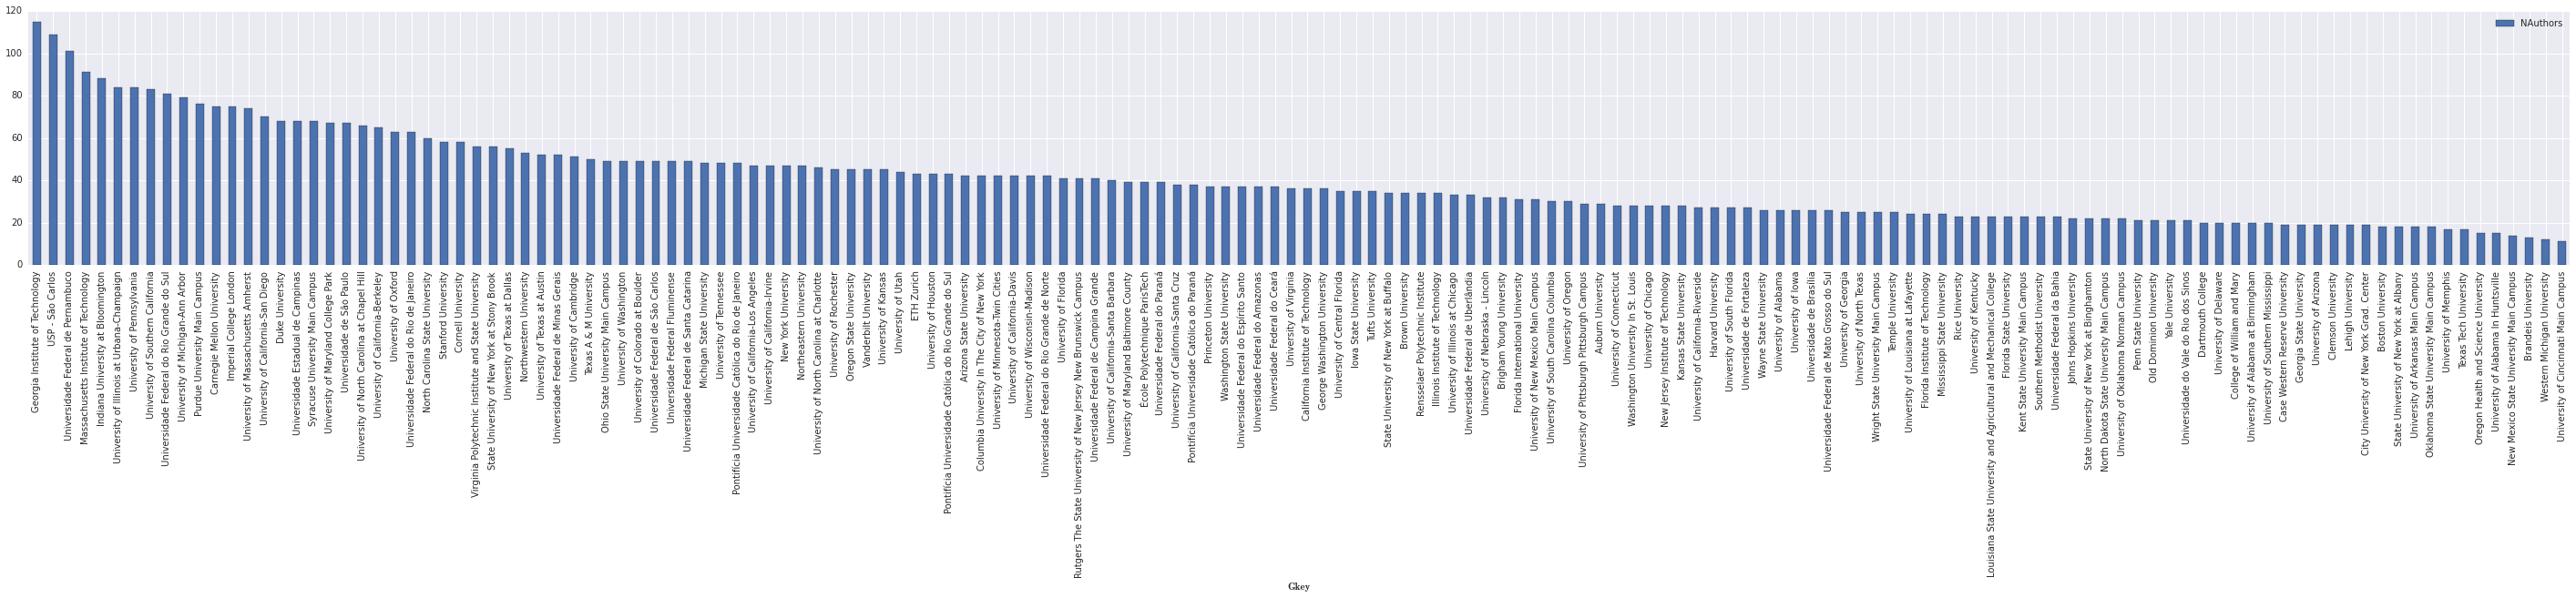

In [349]:
sns.set_style('darkgrid')
ginfo.plot(kind='bar', y='NAuthors', figsize=(50,5))

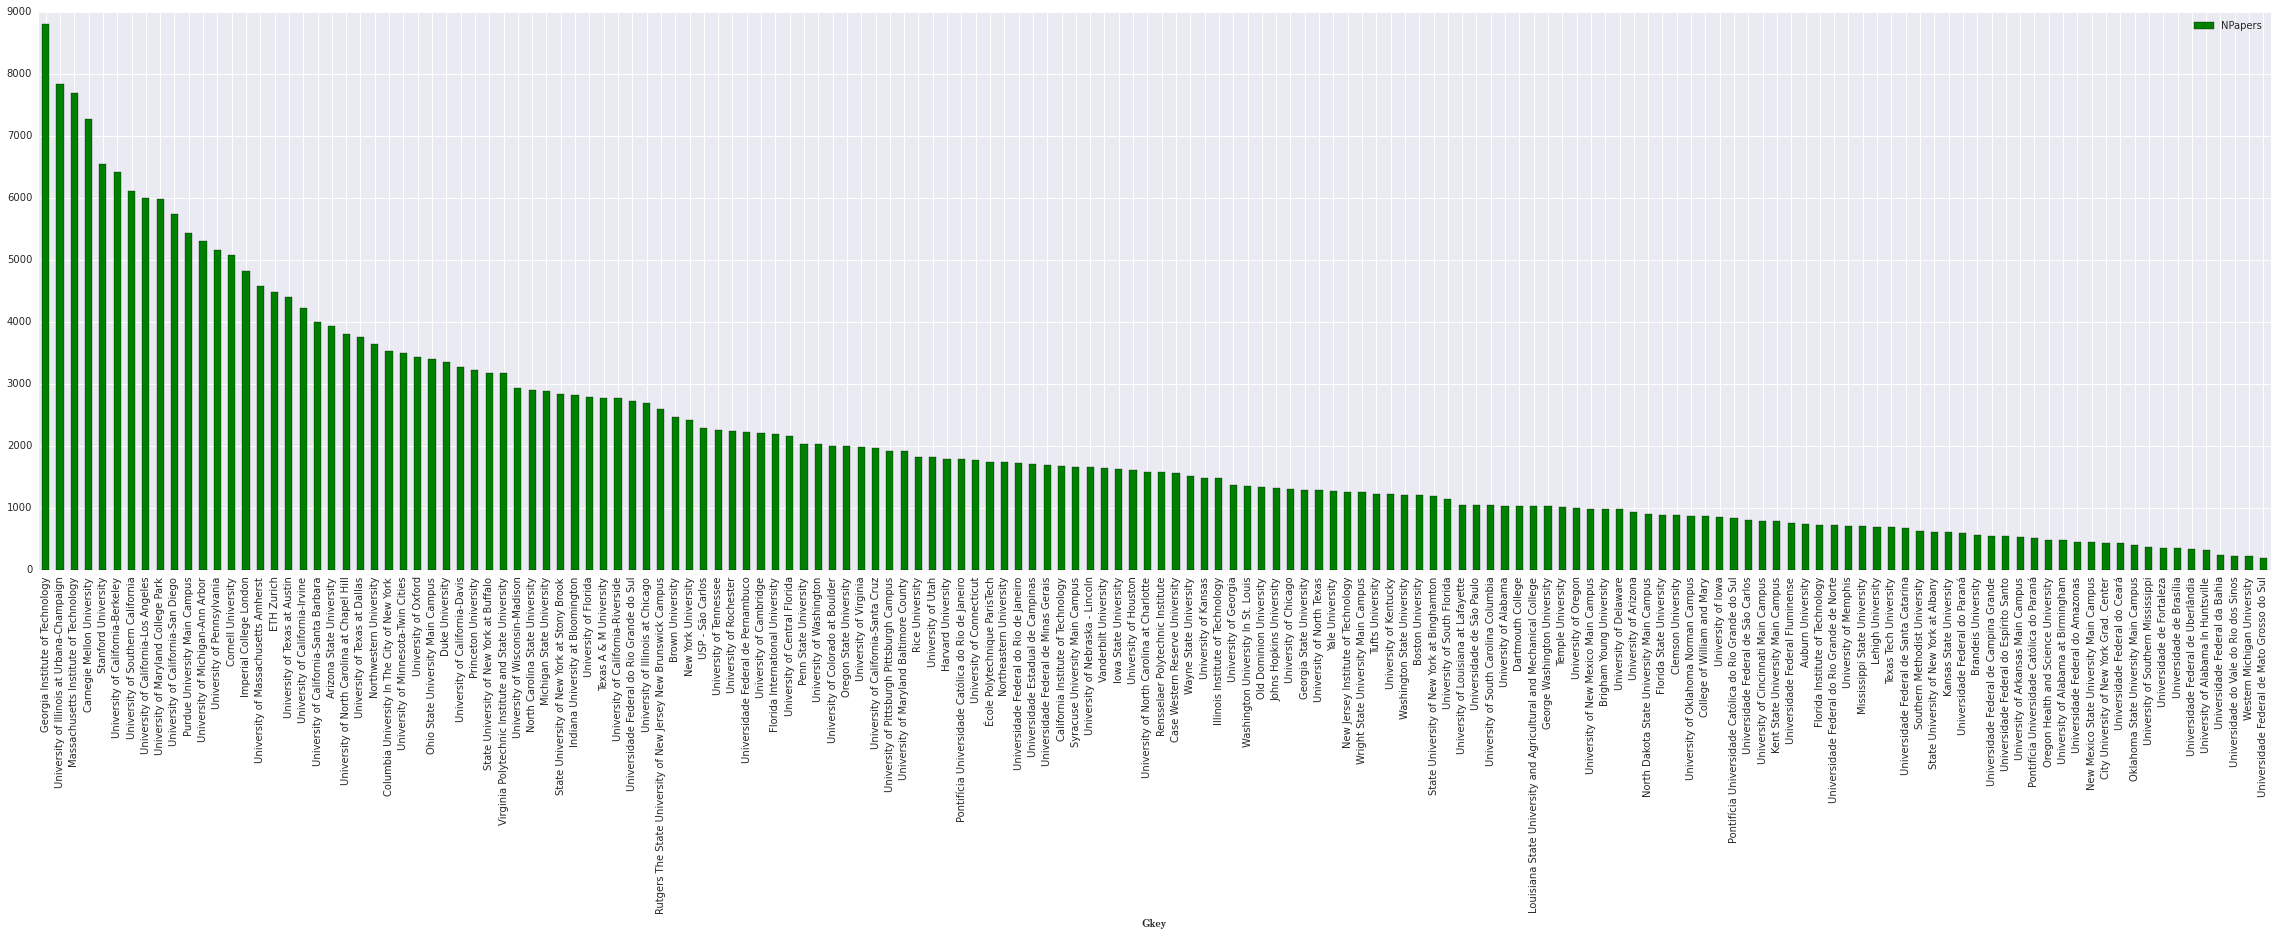

In [351]:
ginfo.sort_values(by='NPapers', ascending=False).plot(kind='bar', color='g', y='NPapers', figsize=(40,10))
savefig('output/figs/Groups-Info.png')

In [279]:
# NOTE: dfgrouppaper is already filtered (1 paper -> 1 group)

gby = gap.drop_duplicates(['Gkey', 'Pkey']).set_index('Gkey').groupby('Pkey')
gsize = gby.size()
papers_with_multiple_groups = gsize[gsize > 1].keys()

pgroups = pd.DataFrame(papers_with_multiple_groups)
pgroups['NGroups'] = pgroups['Pkey'].apply(lambda x: len(gby.groups[x]))
pgroups['Gkeys'] = pgroups['Pkey'].apply(lambda x: gby.groups[x])
pgroups.set_index('Pkey', inplace=True)
pgroups = pgroups[pgroups.index.str.contains('conf/') | pgroups.index.str.contains('journals/')]
pgroups.sort_values(by='NGroups', ascending=False, inplace=True)

pgroups.to_csv('output/Paper-NGroups-Info.csv')
pgroups.head()
#for paper in papers_with_multiple_groups:
#    print paper + ':', gby.groups[paper], '\n'

,NGroups,Gkeys
Pkey,,
conf/sc/FoxRSMBCCCCEFFGHKKLLLOPPSSWY93,13,"[Northwestern University, University of Chicag..."
journals/tkde/Waha93,12,"[University of California-Berkeley, University..."
journals/cacm/AbiteboulABCCCDFGGGHHHIKPLMNSSSSSUWWZ05,11,"[Stanford University, University of Massachuse..."
journals/csur/AgarwalGEEIHHJKKLMMMMMPSSSW02,11,"[Stanford University, Rutgers The State Univer..."
journals/sigmod/AbadiAABBCCDDFGHHHIJKMMMNRMOORSSWW14,10,"[Massachusetts Institute of Technology, Univer..."


In [477]:
marlon = pd.read_csv('input/marlon-groups.csv', skiprows=1)
marlon.head()

,Group0,Score0,Group1,Score1,Group2,Score2,Group3,Score3,Group4,Score4,Group5,Score5,Group6,Score6,Group7,Score7
0,University of Massachusetts Amherst,1.000,University of Massachusetts Amherst,467000,University of Massachusetts Amherst,148.720914,University of Massachusetts Amherst,117.707468,University of Massachusetts Amherst,469522,University of Massachusetts Amherst,488640,University of Massachusetts Amherst,207126.35250,University of Massachusetts Amherst,0.446242
1,University of Illinois at Urbana-Champaign,0.776,University of Illinois at Urbana-Champaign,329339,University of Illinois at Urbana-Champaign,58.741994,University of Illinois at Urbana-Champaign,48.582236,University of Illinois at Urbana-Champaign,330964,University of Illinois at Urbana-Champaign,351570,University of Illinois at Urbana-Champaign,91790.95769,University of Illinois at Urbana-Champaign,0.236493
2,Carnegie Mellon University,0.614,Carnegie Mellon University,239497,Purdue University Main Campus,33.969374,Virginia Polytechnic Institute and State Unive...,29.681026,Carnegie Mellon University,240222,Carnegie Mellon University,271785,University of Illinois at Chicago,49709.11630,University of Illinois at Chicago,0.150264
3,Georgia Institute of Technology,0.543,Georgia Institute of Technology,220373,Virginia Polytechnic Institute and State Unive...,27.427107,Purdue University Main Campus,27.604192,Georgia Institute of Technology,223911,Georgia Institute of Technology,241404,Purdue University Main Campus,49683.89065,Purdue University Main Campus,0.132584
4,University of Southern California,0.483,University of Illinois at Chicago,199967,University of Illinois at Chicago,26.196770,Universidade Federal de Minas Gerais,21.458809,University of Illinois at Chicago,200450,University of Illinois at Chicago,215570,Florida International University,39603.28247,Carnegie Mellon University,0.120324


## Re-ranking Groups (normalizing by n. of authors and papers)

In [478]:
dfs = [0]*10
rankings = []

for i in range(0, 8):
    dfs[i] = marlon[['Group' + str(i), 'Score' + str(i)]].set_index('Group' + str(i))
    dfs[i] = dfs[i].join(ginfo)
    dfs[i].loc[:, 'nScoreA' + str(i)] = dfs[i]['Score' + str(i)] / dfs[i]['NAuthors']
    dfs[i].loc[:, 'nScoreP' + str(i)] = dfs[i]['Score' + str(i)] / dfs[i]['NPapers']

    a = pd.DataFrame(dfs[i].sort_values(by='nScoreA' + str(i), ascending=False).index).rename(
        columns={'Group' + str(i):'RankA' + str(i)})

    b = pd.DataFrame(dfs[i].sort_values(by='nScoreP' + str(i), ascending=False).index).rename(
        columns={'Group' + str(i):'RankP' + str(i)})

    rankings.append(pd.concat([a, b], axis=1))

result = pd.concat(rankings, axis=1)
result.index += 1
result.to_csv('output/Ranking-of-Groups-Normalized.csv')
result

,RankA0,RankP0,RankA1,RankP1,RankA2,RankP2,RankA3,RankP3,RankA4,RankP4,RankA5,RankP5,RankA6,RankP6,RankA7,RankP7
1,University of Illinois at Chicago,Universidade Federal do Amazonas,University of Massachusetts Amherst,Universidade Federal do Amazonas,University of Massachusetts Amherst,University of Massachusetts Amherst,University of Massachusetts Amherst,University of Massachusetts Amherst,University of Massachusetts Amherst,Universidade Federal do Amazonas,University of Massachusetts Amherst,Universidade Federal do Amazonas,University of Massachusetts Amherst,University of Massachusetts Amherst,University of Massachusetts Amherst,University of Massachusetts Amherst
2,University of Massachusetts Amherst,University of Massachusetts Amherst,University of Illinois at Chicago,University of Massachusetts Amherst,Lehigh University,Lehigh University,Lehigh University,Lehigh University,University of Illinois at Chicago,University of Massachusetts Amherst,University of Illinois at Chicago,University of Massachusetts Amherst,University of Illinois at Chicago,Lehigh University,University of Illinois at Chicago,Lehigh University
3,University of Illinois at Urbana-Champaign,Lehigh University,Florida International University,Lehigh University,University of Illinois at Chicago,Northeastern University,University of Illinois at Chicago,University of Iowa,Florida International University,Lehigh University,Florida International University,Lehigh University,Lehigh University,Northeastern University,Florida International University,University of Illinois at Chicago
4,Florida International University,University of Illinois at Chicago,University of Illinois at Urbana-Champaign,University of Illinois at Chicago,Florida International University,Illinois Institute of Technology,University of Illinois at Urbana-Champaign,Universidade Federal de Minas Gerais,University of Illinois at Urbana-Champaign,University of Illinois at Chicago,University of Illinois at Urbana-Champaign,University of Illinois at Chicago,Florida International University,Universidade Federal de Minas Gerais,Lehigh University,Universidade Federal de Minas Gerais
5,Carnegie Mellon University,Universidade Federal de Minas Gerais,Lehigh University,Universidade Federal de Minas Gerais,University of Illinois at Urbana-Champaign,University of Iowa,Virginia Polytechnic Institute and State Unive...,State University of New York at Albany,Lehigh University,Universidade Federal de Minas Gerais,Carnegie Mellon University,Universidade Federal de Minas Gerais,University of Illinois at Urbana-Champaign,University of Illinois at Chicago,University of Illinois at Urbana-Champaign,Florida International University
6,Arizona State University,Florida International University,Carnegie Mellon University,Florida International University,Illinois Institute of Technology,Universidade Federal de Minas Gerais,Florida International University,Universidade Federal do Amazonas,Carnegie Mellon University,Florida International University,Arizona State University,Florida International University,Illinois Institute of Technology,Florida International University,Purdue University Main Campus,Northeastern University
7,Stanford University,University of Rochester,Arizona State University,Oregon Health and Science University,Northeastern University,Universidade Federal do Amazonas,Illinois Institute of Technology,Northeastern University,Arizona State University,Oregon Health and Science University,Lehigh University,Northeastern University,Northeastern University,Illinois Institute of Technology,Virginia Polytechnic Institute and State Unive...,Illinois Institute of Technology
8,Lehigh University,Northeastern University,Stanford University,Northeastern University,Virginia Polytechnic Institute and State Unive...,State University of New York at Albany,University of Iowa,Illinois Institute of Technology,Stanford University,Northeastern University,Stanford University,University of Iowa,Virginia Polytechnic Institute and State

In [479]:
# All individual rankings are stored in dfs
dfs[4]

,Score4,NAuthors,NPapers,nScoreA4,nScoreP4
Group4,,,,,
University of Massachusetts Amherst,469522,74,4586,6344.891892,102.381596
University of Illinois at Urbana-Champaign,330964,84,7845,3940.047619,42.187890
Carnegie Mellon University,240222,75,7268,3202.960000,33.052009
Georgia Institute of Technology,223911,115,8812,1947.052174,25.409782
University of Illinois at Chicago,200450,33,2697,6074.242424,74.323322
Purdue University Main Campus,189254,76,5429,2490.184211,34.859827
University of Southern California,189138,83,6106,2278.771084,30.975762
Stanford University,164756,58,6547,2840.620690,25.165114
University of Michigan-Ann Arbor,148287,79,5304,1877.050633,27.957579


## Extracting New Info to Dataset

In [20]:
vap = dataset.dfvenuesauthorpaper.copy()
vap.groupby(vap.index).Year.max().head() # Info saved on datasets.py

Vkey
books/acm          1995
books/acm/kim95    1995
books/ap           1979
books/av           2014
books/aw           2011
Name: Year, dtype: int64

In [9]:
venuerank[venuerank.VPyear > venuerank.VPfyear].shape[0]

0

In [2]:
venuerank[(venuerank.Vkey == 'conf/icip') | (venuerank.Vkey == 'conf/cvpr')]

,Vkey,VPsize,VPyear,VPfyear
66,conf/icip,17283.0,1994.0,2014.0
194,conf/cvpr,6874.0,1993.0,2014.0


In [4]:
x = dataset.dfvenuesauthorpaper.copy()
x

,Akey,PID,AID,Pkey,Year,VID,Vkey
Vkey,,,,,,,
journals/corr,H. Vincent Poor,0,0,journals/corr/abs-cs-0605098,2006,0,journals/corr
journals/corr,H. Vincent Poor,4,0,journals/corr/SemiariSVBP15,2015,0,journals/corr
journals/corr,H. Vincent Poor,8,0,journals/corr/XuDDP15,2015,0,journals/corr
journals/corr,H. Vincent Poor,10,0,journals/corr/abs-1011-2795,2010,0,journals/corr
journals/corr,H. Vincent Poor,18,0,journals/corr/abs-1101-2007,2011,0,journals/corr
journals/corr,H. Vincent Poor,19,0,journals/corr/abs-cs-0501049,2005,0,journals/corr
journals/corr,H. Vincent Poor,22,0,journals/corr/abs-1304-0992,2013,0,journals/corr
journals/corr,H. Vincent Poor,25,0,journals/corr/abs-cs-0503041,2005,0,journals/corr
journals/corr,H. Vincent Poor,27,0,journals/corr/abs-1001-2806,2010,0,journals/corr


In [25]:
y = x[x.Vkey == 'conf/icip'].drop_duplicates('PID')

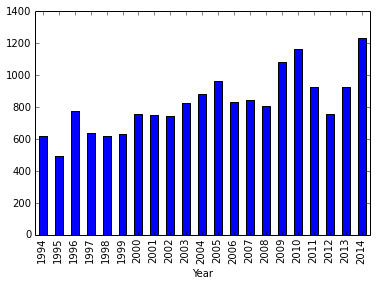

In [27]:
y.groupby('Year').PID.count().plot(kind='bar')

In [16]:
y.groupby('Year').PID.count()

Year
1994     620
1995     494
1996     774
1997     637
1998     621
1999     631
2000     755
2001     750
2002     744
2003     826
2004     885
2005     967
2006     834
2007     843
2008     808
2009    1086
2010    1164
2011     928
2012     759
2013     924
2014    1233
Name: PID, dtype: int64

In [22]:
x[(x.Vkey == 'conf/icip') & (x.Year == 1994)].drop_duplicates('PID')

,Akey,PID,AID,Pkey,Year,VID,Vkey
Vkey,,,,,,,
conf/icip,Thomas S. Huang,6063,6,conf/icip/SheH94,1994,66,conf/icip
conf/icip,Thomas S. Huang,6101,6,conf/icip/LuoCPH94,1994,66,conf/icip
conf/icip,Thomas S. Huang,6234,6,conf/icip/ChenLPH94,1994,66,conf/icip
conf/icip,Thomas S. Huang,6302,6,conf/icip/TangH94,1994,66,conf/icip
conf/icip,Thomas S. Huang,6343,6,conf/icip/TangH94a,1994,66,conf/icip
conf/icip,Thomas S. Huang,6451,6,conf/icip/Gharavi-AlkhansariH94,1994,66,conf/icip
conf/icip,Thomas S. Huang,6549,6,conf/icip/LewH94,1994,66,conf/icip
conf/icip,Lei Wang,10457,11,conf/icip/WangC94,1994,66,conf/icip
conf/icip,Edwin R. Hancock,20300,25,conf/icip/EvansSH94,1994,66,conf/icip


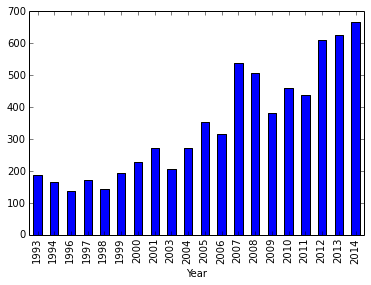

In [28]:
bosta = x[x.Vkey == 'conf/cvpr'].drop_duplicates('PID')
bosta.groupby('Year').PID.count().plot(kind='bar')

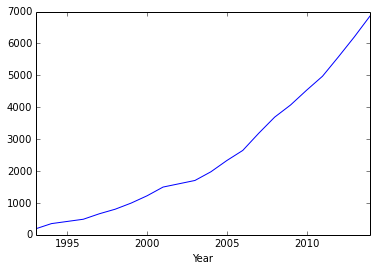

In [23]:
bosta.groupby('Year').PID.count().cumsum().plot()